#  Mamdani

In [44]:
#!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [45]:

def defino_mu():
    x = np.arange(-120,220)
    y = np.arange(-12,22)
    puntuacion_baja = fuzz.trapmf(x, [-90,-20,20,90])
    puntuacion_media = fuzz.trapmf(x, [0,30,70,100])
    puntuacion_alta = fuzz.trapmf(x, [10,80,120,190])

    concepto_regular = fuzz.gaussmf(x,0,25)
    concepto_bueno = fuzz.gaussmf(x,50,25)
    concepto_excelente = fuzz.gaussmf(x,100,25)


    nota_final_baja = fuzz.trapmf(y, [-6.25,-1.25,1.25,6.25])
    nota_final_media_baja = fuzz.trapmf(y, [-3.75,1.25,3.75,8.75])
    nota_final_media = fuzz.trapmf(y, [-1.25,3.75,6.25,11.25])
    nota_final_media_alta = fuzz.trapmf(y, [1.25,6.25,8.75,13.75])
    nota_final_alta = fuzz.trapmf(y, [3.75,8.5,11.5,16.25])

    entrada1 = (puntuacion_baja, puntuacion_media, puntuacion_alta)
    entrada2 = (concepto_regular, concepto_bueno, concepto_excelente)
    salida = (nota_final_baja,nota_final_media_baja, nota_final_media, nota_final_media_alta,nota_final_alta)
    return x, y, entrada1, entrada2, salida

def ploteo_mu(x, y, entrada1, entrada2,salida):

    puntuacion_baja, puntuacion_media, puntuacion_alta = entrada1
    concepto_regular, concepto_bueno, concepto_excelente = entrada2
    nota_final_baja,nota_final_media_baja, nota_final_media, nota_final_media_alta,nota_final_alta = salida

    fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, figsize=(8, 9))

    ax0.plot(x, puntuacion_baja, 'b', linewidth=1.5, label='Puntuación baja')
    ax0.plot(x, puntuacion_media, 'g', linewidth=1.5, label='Puntuación media')
    ax0.plot(x, puntuacion_alta,'r', linewidth=1.5, label='Puntuación alta')
    ax0.set_title('Puntuación examen')
    ax0.legend()

    ax1.plot(x, concepto_regular, 'b', linewidth=1.5, label='Concepto regular')
    ax1.plot(x, concepto_bueno, 'g', linewidth=1.5, label='Concepto bueno')
    ax1.plot(x, concepto_excelente,'r', linewidth=1.5, label='Concepto excelente')
    ax1.set_title('Nota concepto')
    ax1.legend()

    ax2.plot(y, nota_final_baja, 'b', linewidth=1.5, label='Nota baja')
    ax2.plot(y, nota_final_media_baja, 'm', linewidth=1.5, label='Nota medio baja')
    ax2.plot(y, nota_final_media, 'g', linewidth=1.5, label='Nota media')
    ax2.plot(y, nota_final_media_alta, 'y', linewidth=1.5, label='Nota medio alta')
    ax2.plot(y, nota_final_alta,'r', linewidth=1.5, label='Nota alta')
    ax2.set_title('Nota final')
    ax2.legend()


    plt.tight_layout()


def defino_y_evaluo_reglas(x, y, entrada1, entrada2,salida, puntaje_examen,concepto):

    concepto_dict = {
        "regular": 0,
        "bueno": 50,
        "excelente": 100
    }
    
    num_concepto=concepto_dict[str.lower(concepto)]

    puntuacion_baja, puntuacion_media, puntuacion_alta = entrada1
    concepto_regular, concepto_bueno, concepto_excelente = entrada2
    nota_final_baja,nota_final_media_baja, nota_final_media, nota_final_media_alta,nota_final_alta = salida
    
    puntaje_lvl_small= fuzz.interp_membership(x, puntuacion_baja, puntaje_examen)
    puntaje_lvl_medium = fuzz.interp_membership(x, puntuacion_media, puntaje_examen)
    puntaje_lvl_big = fuzz.interp_membership(x, puntuacion_alta, puntaje_examen)

    concepto_lvl_small= fuzz.interp_membership(x, concepto_regular, num_concepto)
    concepto_lvl_medium = fuzz.interp_membership(x, concepto_bueno, num_concepto)
    concepto_lvl_big = fuzz.interp_membership(x, concepto_excelente, num_concepto)

    # Regla 1
    # Si la puntuación del examen es Baja y la nota de concepto es Regular, entonces la nota final es Baja.
    active_rule1 = np.fmin(puntaje_lvl_small, concepto_lvl_small)  
    

    # Regla 2
    # Si la puntuación del examen es Media y la nota de concepto es Regular, entonces la nota final es Media baja.
    active_rule2 = np.fmin(puntaje_lvl_medium, concepto_lvl_small)  
    

    # Regla 3
    # Si la puntuación del examen es Alta y la nota de concepto es Regular, entonces la nota final es alta.
    active_rule3 = np.fmin(puntaje_lvl_big, concepto_lvl_small)  

    # Regla 4
    # Si la puntuación del examen es Baja y la nota de concepto es Bueno, entonces la nota final es Baja.
    active_rule4 = np.fmin(puntaje_lvl_small, concepto_lvl_medium)  
    

    # Regla 5
    # Si la puntuación del examen es Media y la nota de concepto es Bueno, entonces la nota final es Media.
    active_rule5 = np.fmin(puntaje_lvl_medium, concepto_lvl_medium)  
    

    # Regla 6
    # Si la puntuación del examen es Alta y la nota de concepto es Bueno, entonces la nota final es Alta.
    active_rule6 = np.fmin(puntaje_lvl_big, concepto_lvl_medium) 

    # Regla 7
    # Si la puntuación del examen es Baja y la nota de concepto es Excelente, entonces la nota final es Media baja.
    active_rule7 = np.fmin(puntaje_lvl_small, concepto_lvl_big)  
    

    # Regla 8
    # Si la puntuación del examen es Media y la nota de concepto es Excelente, entonces la nota final es media alta.
    active_rule8 = np.fmin(puntaje_lvl_medium, concepto_lvl_big)  
    

    # Regla 9
    # Si la puntuación del examen es Alta y la nota de concepto es Excelente, entonces la nota final es Alta.
    active_rule9 = np.fmin(puntaje_lvl_big, concepto_lvl_big) 

    y_activation_small = np.fmin(np.fmax(active_rule1,active_rule4),nota_final_baja)

    y_activation_medsmall = np.fmin(np.fmax(active_rule2,active_rule7),nota_final_media_baja)

    y_activation_medium = np.fmin(active_rule5,nota_final_media)

    y_activation_medbig = np.fmin(active_rule8,nota_final_media_alta)

    y_activation_big = np.fmin(np.fmax(active_rule3,np.fmax(active_rule6,active_rule9)),nota_final_alta)

   

    y_act = (y_activation_small, y_activation_medsmall,y_activation_medium, y_activation_medbig,y_activation_big)

    return y_act

def ploteo_activacion(y, y_act, puntaje,concepto, salida):

    nota_final_baja,nota_final_media_baja, nota_final_media, nota_final_media_alta,nota_final_alta = salida
    y_activation_small, y_activation_medsmall,y_activation_medium, y_activation_medbig,y_activation_big  = y_act   
    y0 = np.zeros_like(y)  

    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.fill_between(y, y0, y_activation_small, facecolor='b', alpha=0.7)
    ax0.plot(y, nota_final_baja, 'b', linewidth=0.5, linestyle='--', )

    ax0.fill_between(y, y0, y_activation_medsmall, facecolor='m', alpha=0.7)
    ax0.plot(y, nota_final_media_baja, 'm', linewidth=0.5, linestyle='--', )

    ax0.fill_between(y, y0, y_activation_medium, facecolor='g', alpha=0.7)
    ax0.plot(y, nota_final_media, 'g', linewidth=0.5, linestyle='--')

    ax0.fill_between(y, y0, y_activation_medbig, facecolor='y', alpha=0.7)
    ax0.plot(y, nota_final_media_alta, 'y', linewidth=0.5, linestyle='--', )

    ax0.fill_between(y, y0, y_activation_big,  facecolor='r', alpha=0.7)
    ax0.plot(y, nota_final_alta, 'r', linewidth=0.5, linestyle='--')

    ax0.set_title(f'Salida para Puntaje examen:{puntaje} Concepto:{concepto}')

    plt.tight_layout()


def calculo_agregacion(y, y_act):
    
    y_activation_small, y_activation_medsmall,y_activation_medium, y_activation_medbig,y_activation_big  = y_act  
    # aggregation
    aggregated = np.fmax(y_activation_small,
                    np.fmax(y_activation_medsmall,
                        np.fmax(y_activation_medbig,     
                            np.fmax(y_activation_medium, y_activation_big))))

    # Defuzzification
    y_final = fuzz.defuzz(y, aggregated, 'bisector')
    y_activation = fuzz.interp_membership(y, aggregated, y_final)  # for plot

    return y_final, y_activation, aggregated


def ploteo_final(y, salida, aggregated, y_final, y_activation, puntaje_examen,concepto):
    nota_final_baja,nota_final_media_baja, nota_final_media, nota_final_media_alta,nota_final_alta = salida
    y0 = np.zeros_like(y)
    # visualizamos
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.plot(y, nota_final_baja, 'b', linewidth=0.5, linestyle='--', )
    ax0.plot(y, nota_final_media_baja, 'm', linewidth=0.5, linestyle='--', )
    ax0.plot(y, nota_final_media, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(y, nota_final_media_alta, 'y', linewidth=0.5, linestyle='--', )
    ax0.plot(y, nota_final_alta, 'r', linewidth=0.5, linestyle='--')
    ax0.fill_between(y, y0, aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([y_final, y_final], [0, y_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title(f'Resultado para Puntaje examen:{puntaje_examen} Concepto:{concepto}')
    ax0.text(0.5,0.5, f'Nota final = {round(y_final,2)}', fontsize = 22)



    plt.tight_layout()

def mamdani(puntaje_examen,concepto,plot_mu = True):

     x, y, entrada1, entrada2,mu_salida = defino_mu()
     if plot_mu: ploteo_mu(x, y, entrada1, entrada2, mu_salida)
     y_act = defino_y_evaluo_reglas(x, y, entrada1, entrada2, mu_salida, puntaje_examen,concepto)
     ploteo_activacion(y, y_act, puntaje_examen,concepto ,mu_salida)
     y_final, y_activation, aggregated = calculo_agregacion(y, y_act)
     ploteo_final(y, mu_salida, aggregated, y_final, y_activation, puntaje_examen,concepto)


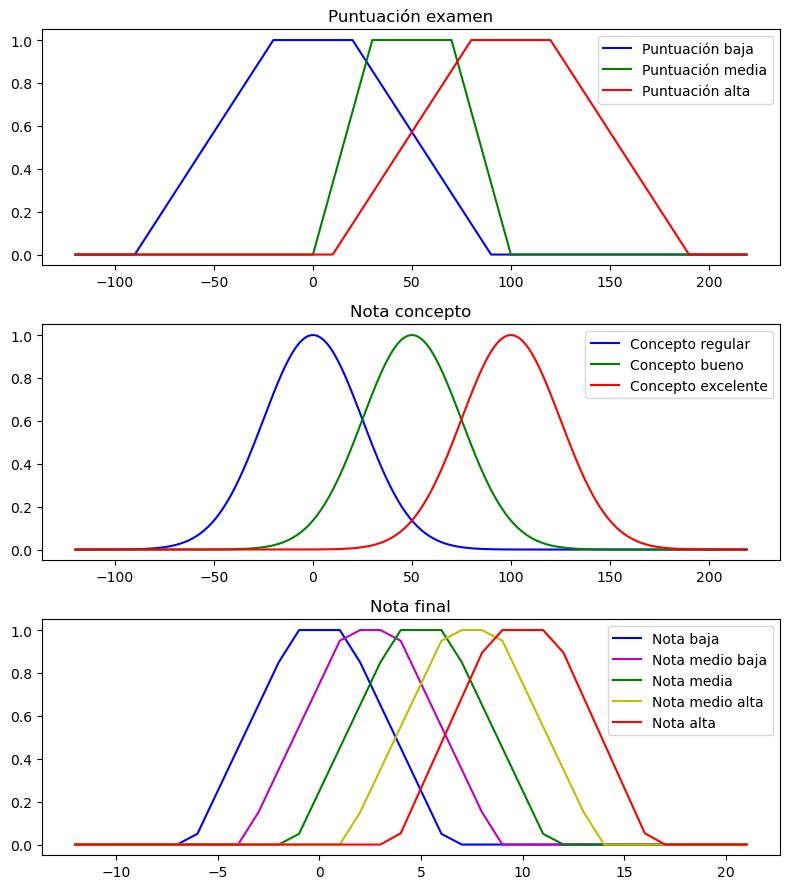

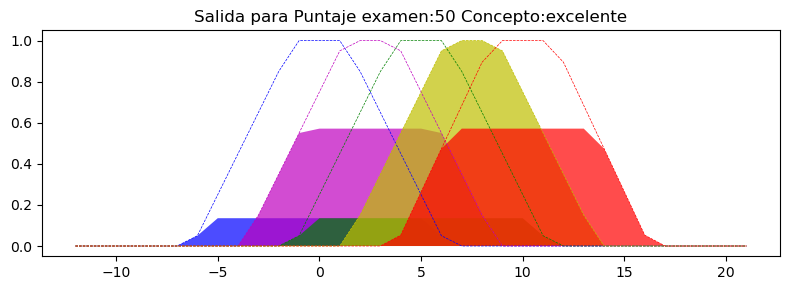

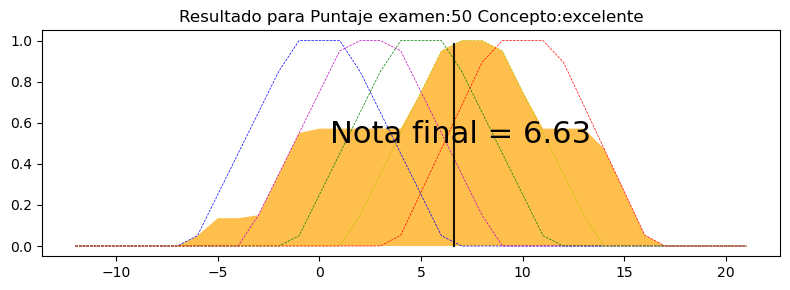

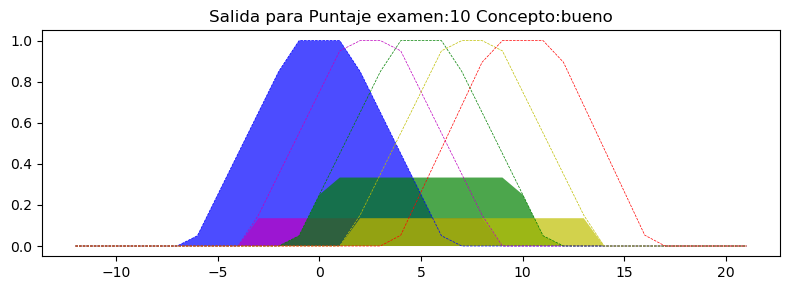

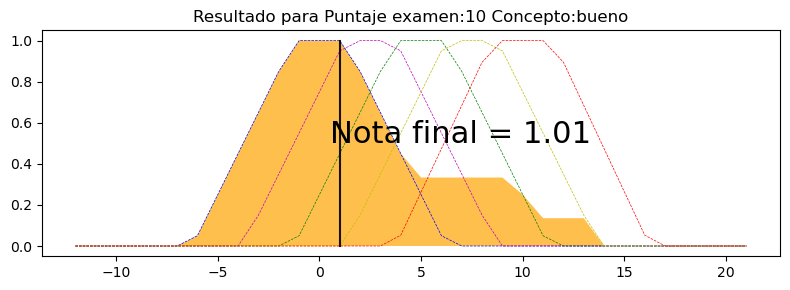

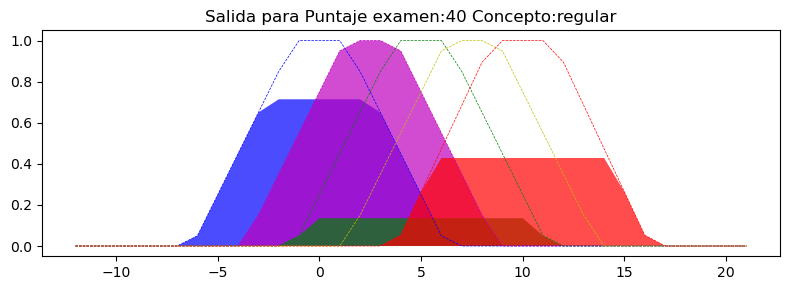

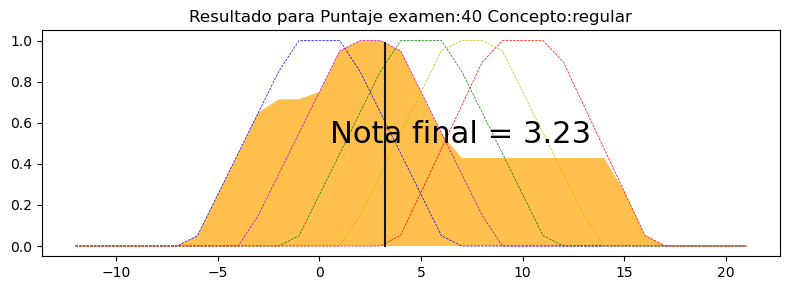

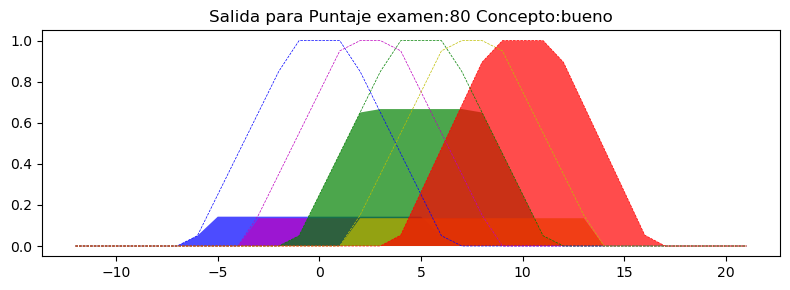

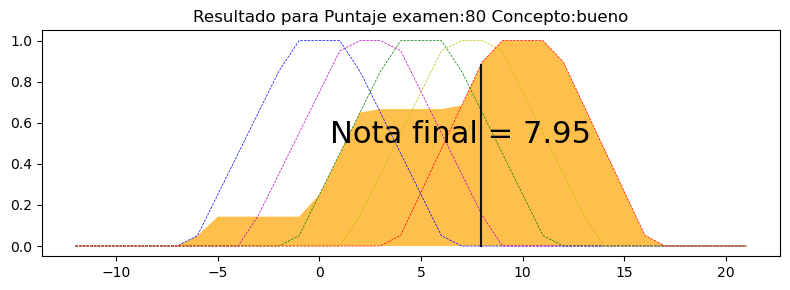

In [46]:

#Calculo varios ejemplos pero solo el primero muestra los grafico de funciones

mamdani(50,'excelente')
mamdani(10,'bueno',False)
mamdani(40,'regular',False)
mamdani(80,'bueno',False)
